<a href="https://colab.research.google.com/github/victornator25/Optics-_Course_AgoDic_2023/blob/main/practica5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import os
from scipy import special
import sympy as sp

In [14]:
potr=[]
angr=[]
pott = []
angt = []

datat = pd.read_csv('transmision.csv')
angt.append(datat["Grados"])
pott.append(datat["Amplitud (Mili-Voltaje)"])
datar = pd.read_csv('reflexion.csv')
angr.append(datar["Grados"])
potr.append(datar["Amplitud(Mili-Volts)"])


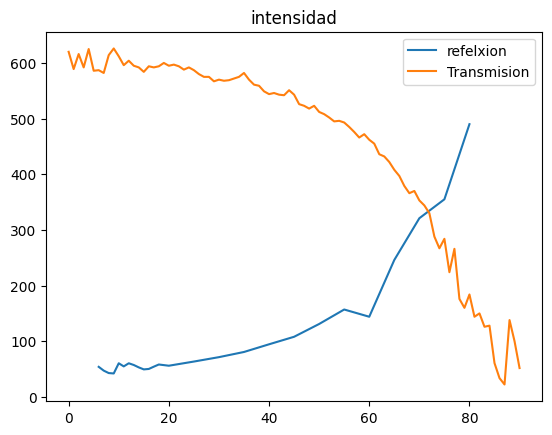

In [15]:
plt.title('intensidad')
plt.plot(angr[0],potr[0],label="refelxion")
plt.plot(angt[0],pott[0],label="Transmision")
plt.legend()

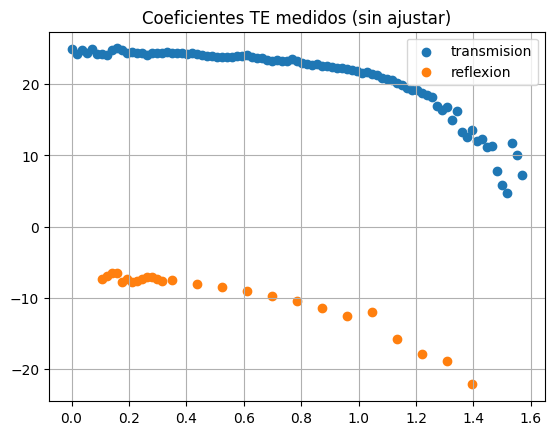

In [16]:
plt.title("Coeficientes TE medidos (sin ajustar)")
Et = np.sqrt(pott[0])
Er = -np.sqrt(potr[0])
plt.scatter(angt[0]*(np.pi/180),Et,label = f"transmision")
plt.scatter(angr[0]*(np.pi/180),Er,label = f"reflexion")
plt.grid()
plt.legend()

In [17]:
def fr(x):
    a =(np.cos(x)-np.sqrt(1.51**2-np.sin(x)**2))/(np.cos(x)+np.sqrt(1.51**2-np.sin(x)**2))
    return a
def ft(x):
    a = (2*np.cos(x))/(np.cos(x)+np.sqrt(1.51**2-np.sin(x)**2))
    return a

In [18]:
x = 80*np.pi/180
(np.cos(x)-np.sqrt(1.51**2-np.sin(x)**2))/(np.cos(x)+np.sqrt(1.51**2-np.sin(x)**2))


-0.7365596787765417

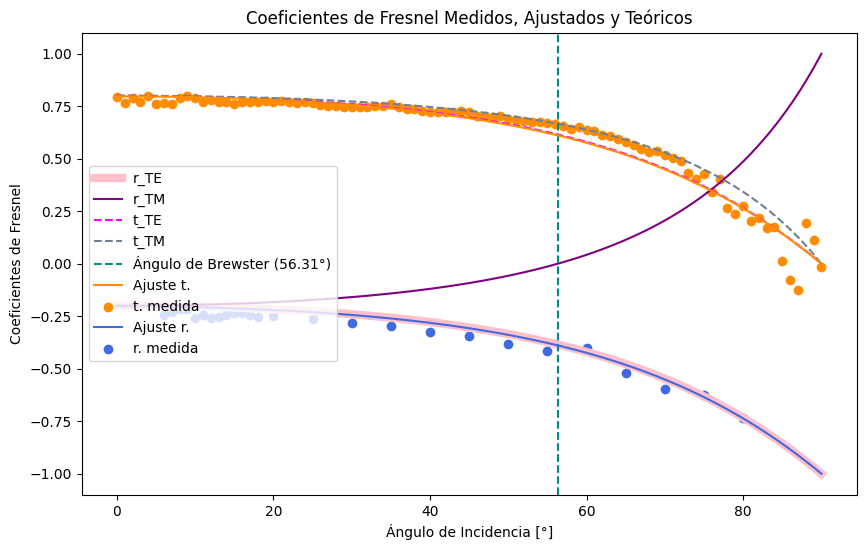

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk


# Índices de refracción relativos
n1 = 1.0  # Índice de refracción del medio incidente (por ejemplo, aire)
n2 = 1.5  # Índice de refracción del medio transmitido (por ejemplo, vidrio)

# Ángulos de incidencia en radianes
theta_i = np.linspace(0, np.pi/2, 100)

# Cálculo de los coeficientes de Fresnel
R_TE = (np.cos(theta_i) - np.sqrt((n2/n1)**2 - np.sin(theta_i)**2)) / (np.cos(theta_i) + np.sqrt((n2/n1)**2 - np.sin(theta_i)**2))
R_TM = (-(n2/n1)**2 * np.cos(theta_i) + np.sqrt((n2/n1)**2 - np.sin(theta_i)**2)) / ((n2/n1)**2 * np.cos(theta_i) + np.sqrt((n2/n1)**2 - np.sin(theta_i)**2))
T_TE = (2 * np.cos(theta_i)) / (np.cos(theta_i) + np.sqrt((n2/n1)**2 - np.sin(theta_i)**2))
T_TM = (2* (n2/n1)* np.cos(theta_i)) / ((n2/n1)**2 * np.cos(theta_i) + np.sqrt((n2/n1)**2 - np.sin(theta_i)**2))

# Ángulo de Brewster
theta_Brewster = np.arctan(n2/n1)

# Creación de gráficos
plt.figure(figsize=(10, 6))
plt.plot(np.degrees(theta_i), R_TE, label='r_TE',  color='pink',linewidth=6)
plt.plot(np.degrees(theta_i), R_TM, label='r_TM', color='purple')
plt.plot(np.degrees(theta_i), T_TE, label='t_TE', linestyle='--', color='magenta')
plt.plot(np.degrees(theta_i), T_TM, label='t_TM', linestyle='--', color='slategrey')
plt.axvline(np.degrees(theta_Brewster), color='darkcyan', linestyle='--', label=f'Ángulo de Brewster ({np.degrees(theta_Brewster):.2f}°)')
plt.xlabel('Ángulo de Incidencia [°]', color='black')
plt.ylabel('Coeficientes de Fresnel')
plt.legend()
plt.grid()






x = np.linspace(0,np.pi/2,1000)
o = np.zeros(1000)
n = 1.51
plt.title("Coeficientes de Fresnel Medidos, Ajustados y Teóricos")
fx = ((2*n*np.cos(x))/(np.sqrt(n**(2)-np.sin(x)**2)+n**(2)*np.cos(x)))
plt.plot(x*(180/np.pi),ft(x),label="Ajuste t.", color='darkorange')
plt.scatter(angt[0],0.8*(Et-7.5)/(max(Et-7.5)),label = f"t. medida", color='darkorange')
fxr = ((-n**(2)*np.cos(x)+np.sqrt(n**(2)-np.sin(x)**2)))/(n**(2)*np.cos(x)+np.sqrt(n**(2)-np.sin(x)**2))
plt.plot(x*(180/np.pi),fr(x),label="Ajuste r.", color='royalblue')
plt.scatter(angr[0],0.7365596787765417*Er/abs(min(Er)),label = f"r. medida", color='royalblue')
plt.legend(loc="center left")
plt.grid()
plt.show()